In [126]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('nba_advanced.csv')

In [128]:
# convert numerical fields to correct datatype
numeric_cols = [col for col in df.columns if col not in ['Season', 'Tm', 'Lg', 'Pos', 'url']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [129]:
# remove unnamed columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

In [130]:
# remove any obs of DID NOT PLAY
discard = ['Did Not Play']
df = df[df['Pos'].str.contains('|'.join(discard))==False]

In [131]:
# very few are listed in multiple positions
# reduce to PG, SG, SF, PF, C
valid_pos = ['PG', 'SG', 'SF', 'PF', 'C']
df = df[df['Pos'].isin(valid_pos)]

In [132]:
# reduce df to seasons where player played at least 20 games
df = df[df['G'] >= 20]

In [133]:
# reduce to ages that have more than 20 data points
df['Age'].value_counts()

df = df[(df['Age'] >= 20) & (df['Age'] <= 35)]

In [134]:
df = df.reset_index(drop=True)

In [135]:
# save as csv file ready for tableau
df.to_csv('tableau.csv', index=False)

In [136]:
sns.set_style('darkgrid')

In [138]:
df['BPM'].corr(df['WS/48'])

0.8935657008046521

In [139]:
# sns.lmplot(data=df, x='Age', y='DWS', x_jitter=1, lowess=True)
# plt.show()

In [140]:
age = df.groupby('Age')

In [162]:
columns_of_interest = ['BPM', 'TS%', 'PER', 'USG%', 'OWS', 'DWS', 'WS/48']

# for col in columns_of_interest:

#     temp_df = age.describe()[col][['count', 'mean']]

#     sns.scatterplot(data=temp_df, x='Age', y='mean', size='count')

    # plt.ylabel(col)
    
    # plt.title('Average ' + col + ' by Age')

    # plt.legend(title='Player Count', loc=(1.01,0.01))

    # plt.show()

In [142]:
# sns.pairplot(df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/groupby/groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


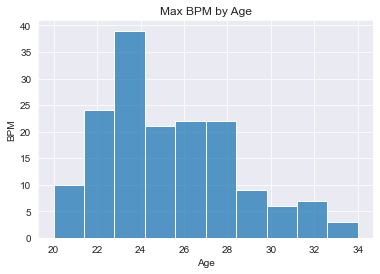

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/groupby/groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


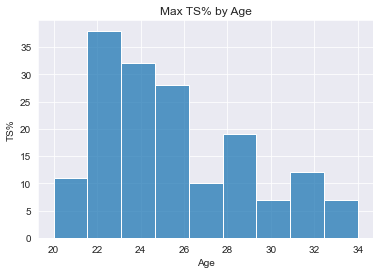

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/groupby/groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


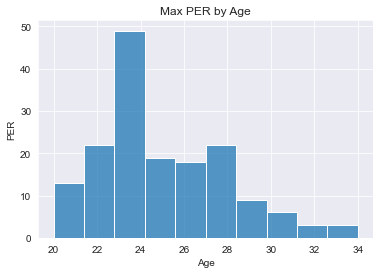

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/groupby/groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


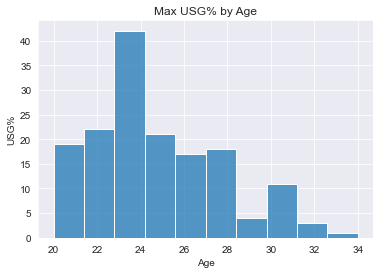

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/groupby/groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


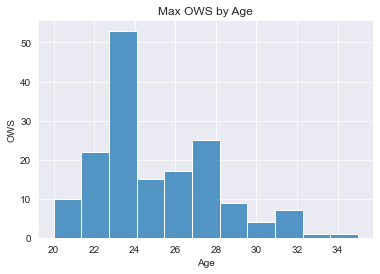

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/groupby/groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


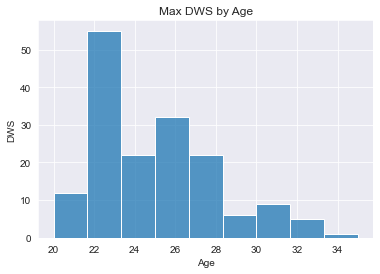

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/groupby/groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


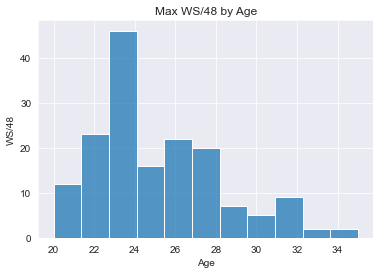

In [172]:
# at what age does a player achieve their max performance?

for col in columns_of_interest:

    idx_maxs = list(df.groupby('url').idxmax()[col])

    idx_maxs = [idx_max for idx_max in idx_maxs if str(idx_max) != 'nan']

    max_ws = df.loc[idx_maxs,:]

    sns.histplot(data=max_ws, x='Age')

    plt.ylabel(col)
    
    plt.title('Max ' + col + ' by Age')

    plt.show()